In [1]:
import matplotlib.pyplot as plt

principal_amount = float(input("Loan amount"))
annual_interest_rate = float(input("Annual interest rate in percentage"))
loan_tenure_years = int(input("Loan tenure in years"))

ValueError: could not convert string to float: ''

In [ ]:
if principal_amount  <= 0 or annual_interest_rate <= 0 or loan_tenure_years <= 0:
    raise ValueError("Invalid input for principal, rate, or tenure")

In [ ]:
def calculate_emi(principal, rate, years):
    monthly_rate = rate / 12 / 100
    months = years * 12
    emi = (principal * monthly_rate * (1 + monthly_rate)**months) / ((1 + monthly_rate)**months - 1)
    total_payment = emi * months
    interest_paid = total_payment - principal
    
    return emi, total_payment, interest_paid, months


emi, total_payment, interest_paid, total_months = calculate_emi(principal_amount, annual_interest_rate, loan_tenure_years)

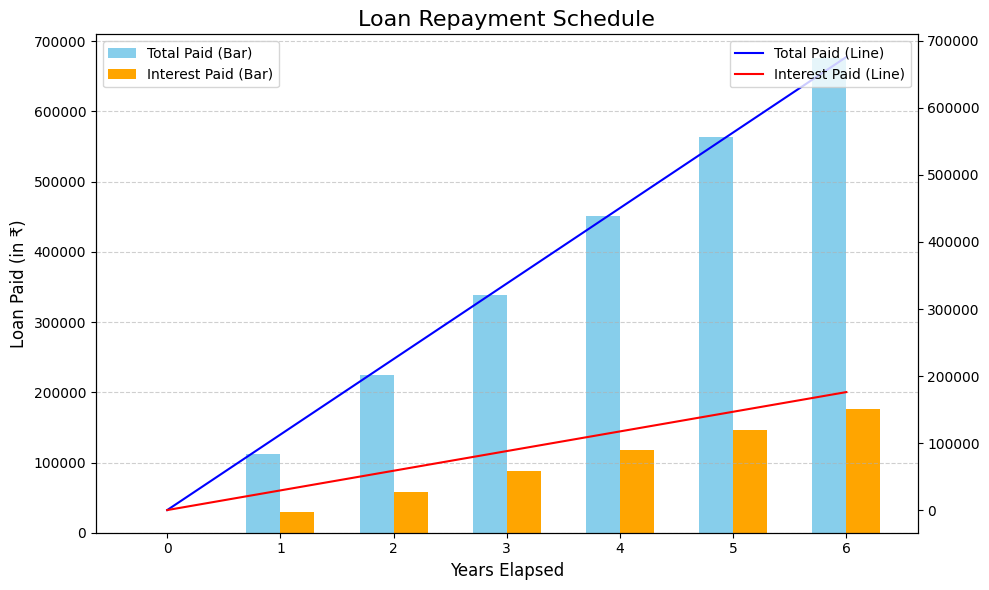

In [ ]:
import matplotlib.pyplot as plt

def plot_repayment_schedule_with_bars(principal, emi, total_payment, interest_paid, years):
    months = years * 12
    total_paid = [emi * month for month in range(0, months + 1)]
    interest_component = [interest_paid * (month / months) for month in range(0, months + 1)]
    elapsed_years = [month / 12 for month in range(0, months + 1)]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    bar_width = 0.3
    x_bar_positions = [year for year in range(0, years + 1)]  
    total_paid_per_year = [emi * year * 12 for year in range(0, years + 1)]
    interest_per_year = [interest_paid * (year / years) for year in range(0, years + 1)]
    
    ax1.bar([x - bar_width / 2 for x in x_bar_positions], total_paid_per_year, width=bar_width, 
            color='skyblue', label='Total Paid (Bar)')
    ax1.bar([x + bar_width / 2 for x in x_bar_positions], interest_per_year, width=bar_width, 
            color='orange', label='Interest Paid (Bar)')
    
    ax2 = ax1.twinx()
    ax2.plot(elapsed_years, total_paid, color='blue', label='Total Paid (Line)')
    ax2.plot(elapsed_years, interest_component, color='red', label='Interest Paid (Line)')
    
    ax1.set_xlabel('Years Elapsed', fontsize=12)
    ax1.set_ylabel('Loan Paid (in ₹)', fontsize=12)
    ax1.set_title('Loan Repayment Schedule', fontsize=16)

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    ax1.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_repayment_schedule_with_bars(principal_amount, emi, total_payment, interest_paid, loan_tenure_years)


In [ ]:
print("Summary :")
print(f"Loan Amount : {principal_amount}\nRate of Interest : {annual_interest_rate}\nTotal Duration of Loan : {loan_tenure_years}\nTotal Amount paid at the end of Loan tenure : {round(total_payment, 2)}")

Summary :
Loan Amount : 500000.0
Rate of Interest : 10.5
Total Duration of Loan : 6
Total Amount paid at the end of Loan tenure : 676042.92
